In [8]:
# some initialization first
import numpy as np
from matplotlib import pyplot as plt


Network deifinition

In [2]:
# assume some unit gaussian 10-D input data
D = np.random.rand(1000, 10)
# 10 layers network with 500 units each
hidden_layers_sizes = [500]*10
nonlinearities = ['tanh'] * len(hidden_layers_sizes)

Single pass though network caching activation outputs

In [6]:
act = {'relu': lambda x:np.maximum(0,x), 'tanh': lambda x:np.tanh(x)}
Hs = {}

# Iterate through layers
for i in range(len(hidden_layers_sizes)):
  X = D if i == 0 else Hs[i-1]  # get imput at this layer
  # get shapes for creating weight matrix for this layer
  fan_in = X.shape[1]
  fan_out = hidden_layers_sizes[i]
  W = np.random.randn(fan_in, fan_out) * 0.01  # layer initialization

  H = X @ W  # affine operation
  H = act[nonlinearities [i]](H)  # nonlinearity
  Hs[i] = H  # cache resoult on this laye



Plotting distribution at each leayer

imput later had mean 0.5001158678423974 and std 0.28857632482532525
later 1 had mean 0.0005877869065892195 and std 0.018198542115312147
later 2 had mean -0.00012921145362798097 and std 0.004047687245876172
later 3 had mean 2.1859741477542104e-05 and std 0.0008828985533149459
later 4 had mean 5.016591921954675e-06 and std 0.00019462926337007985
later 5 had mean -1.1126021265906338e-06 and std 4.212012778222254e-05
later 6 had mean -7.460771986280477e-07 and std 8.951131635998591e-06
later 7 had mean -1.3763447919308266e-07 and std 2.002590145753532e-06
later 8 had mean -6.80936594785418e-09 and std 4.549606274797398e-07
later 9 had mean -7.781181712398038e-09 and std 9.906653158479312e-08
later 10 had mean -1.0340696659539779e-09 and std 2.101236244288594e-08


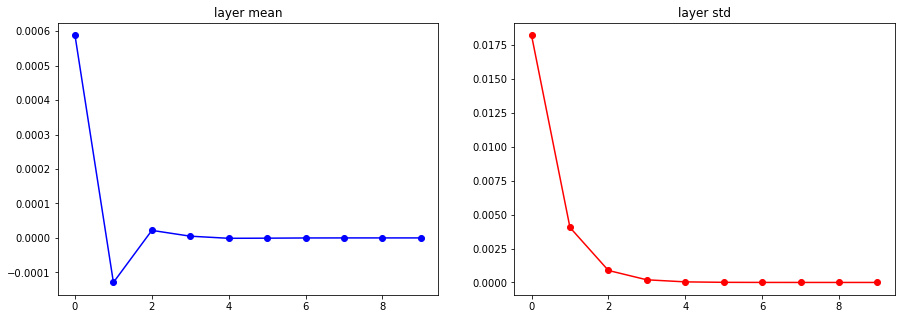

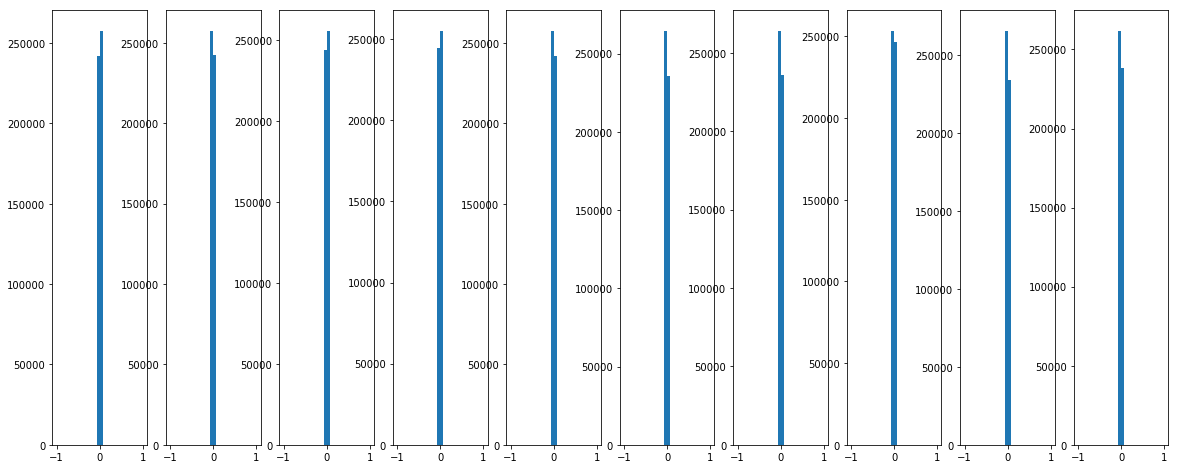

In [16]:
# look at distribution at each layer
print("imput later had mean {0} and std {1}".format(np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i,H in Hs.items()]
layer_std = [np.std(H) for i,H in Hs.items()]

for i, H in Hs.items():
  print("later {0} had mean {1} and std {2}".format(i+1, layer_means[i],
                                                    layer_std[i]))
# plot the means and standard deviations
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means, 'ob-')
plt.title("layer mean")
plt.subplot(122)
plt.plot(list(Hs.keys()), layer_std, 'or-')
plt.title('layer std')

# plot the raw distributions
plt.figure(figsize=(20, 8))
for i, H in Hs.items():
  plt.subplot(1, len(Hs), i+1)
  plt.hist(H.ravel(), 30, range=(-1, 1))

plt.show()
